# Nomes:
> Allan Samuel  
> Guilherme Portas  
> Thiago Dellano

Decidimos escolher o dataset de risco de doenças de hábitos diários por conta da variedade de dados quantitativos que permitem uso de gráficos para a análise de dados, e por ser bem interessante. Vale ressaltar que foi necessário reduzir a quantidade de dados usados porque os dados ficam concentrados até demais para a análise por causa da grande quantidade.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

database = pd.read_csv("health_lifestyle_classification.csv", nrows=1500)

In [ ]:
def GenderToInt(gender):
    if(gender == 'Female'): return 0; # Feminino = 0 e masculino = 1
    else: return 1;

database['gender'] = database['gender'].apply(GenderToInt)

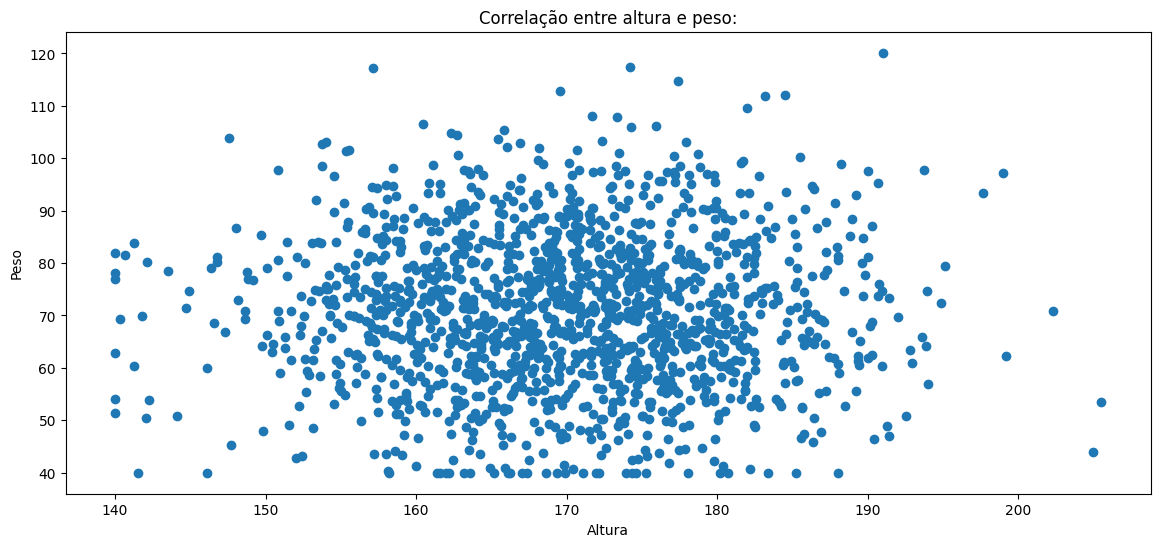

In [19]:
plt.figure(figsize=(14,6))
plt.scatter(database['height'], database['weight'], alpha=1)
plt.title('Correlação entre altura e peso:')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

Existe sim, a depender da altura, existe um peso específico, o que pode indicar saúde ou não, como é feito no cálculo IMC.  
O gráfico plotado apoia essa hipótese, porque geralmente, por exemplo, no intervalo entre 1.60 a 1.80, o peso que mais concentrado é entre 70 e 80 kilos (saudável) apesar de ter alguns outliers.

In [17]:
database.head()

,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,...,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,1,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,...,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,0,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,...,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,1,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,...,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,0,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,...,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,0,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,...,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


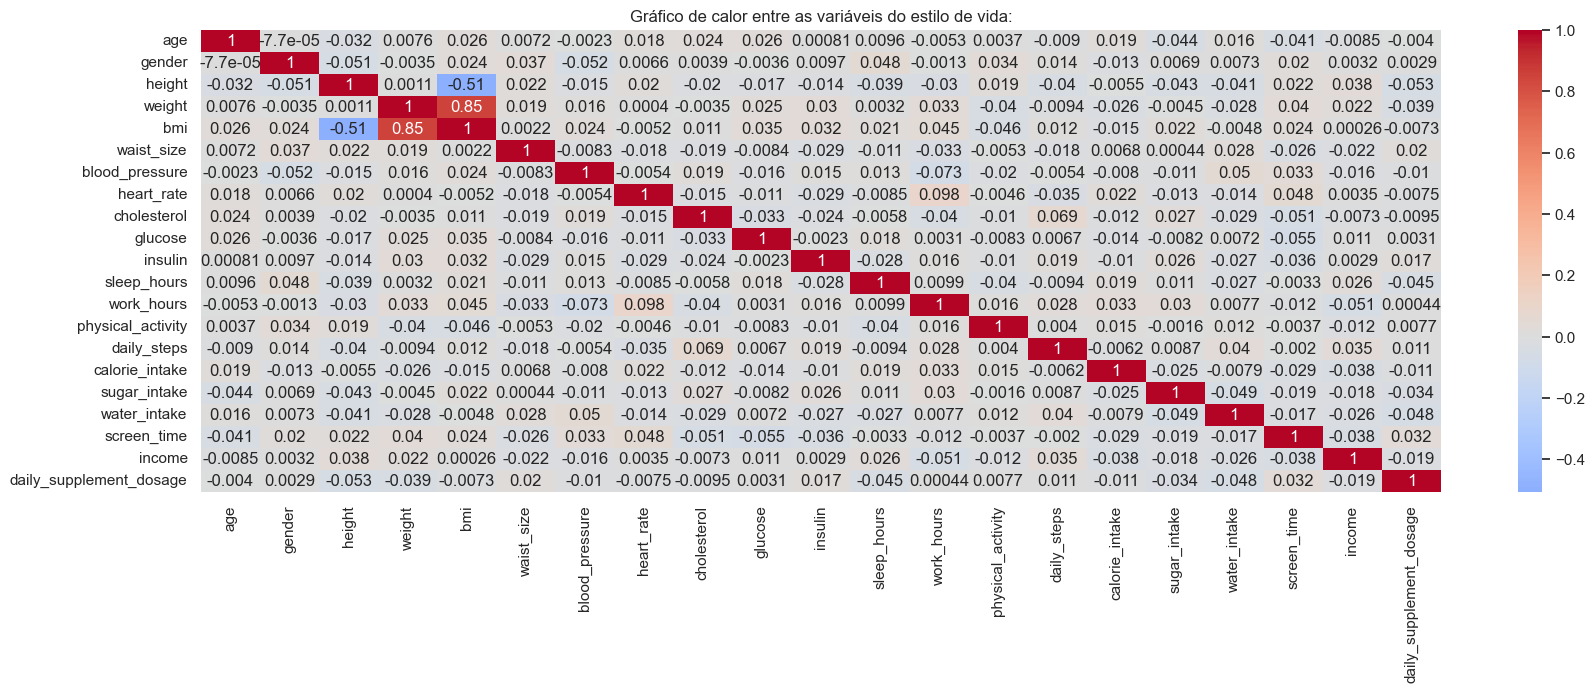

In [31]:
import seaborn as sns

variaveis = ['age', 'gender','height', 'weight', 'bmi', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours', 'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake', 'sugar_intake', 'water_intake', 'screen_time', 'income', 'daily_supplement_dosage']

matrizCorrelacao = database[variaveis].corr()
sns.set(rc={"figure.figsize":(20,6)})
sns.heatmap(matrizCorrelacao, annot=True, cmap='coolwarm', center=0)
plt.title("Gráfico de calor entre as variáveis do estilo de vida:")
plt.show()

A relação mediana entre a altura e o BMI (Body Mass Index), foi uma surpresa, pois era esperado que tivesse mais relação, por exemplo, pessoas de baixa estatura possuem uma tendência de engordarem mais rapidamente do que comparado com uma pessoa de alta estatura.

# Conclusão 
Foram dados bem concretos e pela quantidade, foi necessário tratá-los, mas a veracidade deles fez com que fossem criados gráficos bastante relevantes para a pesquisa. O primeiro gráfico foi ao encontro da nossa hipótese, enquanto o segundo, pela quantidade de variáveis, nos surpreendeu.

# atividade 2

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

diabetes = pd.read_excel('Diabetes_Dataset_Missing_Data.xlsx')
diabetes_antes = pd.read_excel('Diabetes_Dataset_Missing_Data.xlsx')
colunas = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'familyHistoryDiabetes', 'Age', 'Outcome']

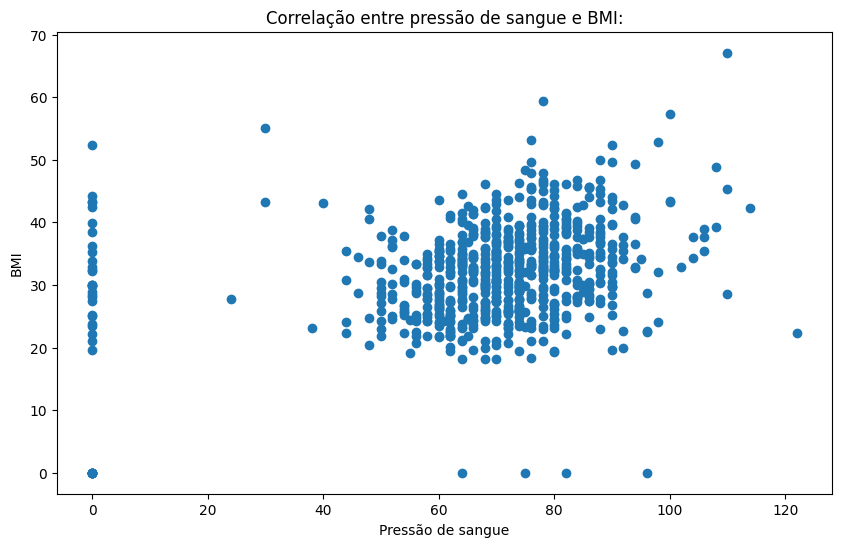

In [ ]:
# Antes
plt.figure(figsize=(10,6))
plt.scatter(diabetes_antes['BloodPressure'], diabetes_antes['BMI'], alpha=1)
plt.title('Correlação entre pressão de sangue e BMI:')
plt.xlabel('Pressão de sangue')
plt.ylabel('BMI')
plt.show()

In [69]:
# Depois
for coluna in colunas:
    media_coluna = round(diabetes[coluna].mean(), 1)
    std_coluna = diabetes[coluna].std()
    dist_tolerancia = 2 * std_coluna
    upper_outliers = diabetes[coluna][diabetes[coluna] > media_coluna + dist_tolerancia]
    lower_outliers = diabetes[coluna][diabetes[coluna] < media_coluna - dist_tolerancia]
    outliers = pd.concat([upper_outliers, lower_outliers], ignore_index=True)

    diabetes.fillna({coluna:media_coluna}, inplace=True)
    diabetes.loc[diabetes[coluna].isin(outliers), coluna] = media_coluna
#print(diabetes.head(20))
#result = diabetes.iloc[150:180]
#print(result)

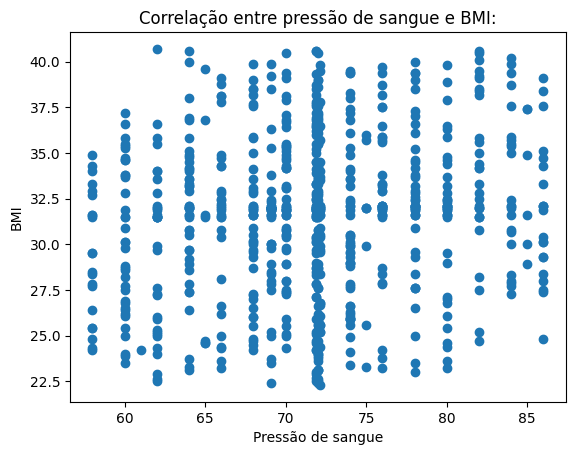

In [70]:
plt.figure()
plt.scatter(diabetes['BloodPressure'], diabetes['BMI'], alpha=1)
plt.title('Correlação entre pressão de sangue e BMI:')
plt.xlabel('Pressão de sangue')
plt.ylabel('BMI')
plt.show()